In [9]:
%load_ext autoreload

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [12]:
%autoreload
from pathlib import Path
import sys
root = Path().resolve().absolute().parent.parent
print(root)
sys.path.append(str(root))

from src.pipeline import Pipeline, BuilingIdsEnum
pipe = Pipeline()



/Users/matsalexander/Desktop/SolarEnergyImpact


In [13]:
building_b = pipe.get_data(BuilingIdsEnum.B)
building_c = pipe.get_data(BuilingIdsEnum.C)

# remove from 2024-01-15 from dataset A
mask = (building_b['timestamp'] >= '2024-01-15') & (building_b['timestamp'] <= '2024-01-15')
building_b = building_b[~mask]
# let value_import be equal to net_consumption for main


# normalize the value_import by area and call it value for main and building_b
building_b['value'] = building_b['value_import'] / building_b['area']
building_c['value'] = building_c['net_consumption'] / building_c['area']

combined_df = pd.concat([ building_b, building_c], ignore_index=True)
# reset index
combined_df = combined_df.reset_index(drop=True)
# Perform the train-test split with stratification based on 'building_id'
train_data, test_data = train_test_split(
    combined_df,
    test_size=0.20,
    random_state=42,
    stratify=combined_df['building']
)

# select features
target = "value"
features = ["timestamp", "temperature", "wind_speed"] #, "cloud_fraction", "precipitation", "area"

train_data = train_data[features + [target]]
test_data = test_data[features + [target]]



In [ ]:
# Train the model using AutoGluon
predictor = TabularPredictor(label=target, eval_metric='mean_absolute_error').fit(
    train_data, 
    presets='best_quality',
    excluded_model_types=['KNN']
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20241112_140917"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       13.97 GB / 32.00 GB (43.7%)
Disk Space Avail:   612.91 GB / 926.35 GB (66.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

[1000]	valid_set's l1: 0.0050427
[2000]	valid_set's l1: 0.0048166
[3000]	valid_set's l1: 0.00468685
[4000]	valid_set's l1: 0.0046119
[5000]	valid_set's l1: 0.00455073
[6000]	valid_set's l1: 0.00450212


	Ran out of time, early stopping on iteration 6066. Best iteration is:
	[6066]	valid_set's l1: 0.00449917


[1000]	valid_set's l1: 0.00509813
[2000]	valid_set's l1: 0.00486942
[3000]	valid_set's l1: 0.00474949
[4000]	valid_set's l1: 0.0046603


	Ran out of time, early stopping on iteration 4279. Best iteration is:
	[4277]	valid_set's l1: 0.00463909


[1000]	valid_set's l1: 0.00526409
[2000]	valid_set's l1: 0.00505519
[3000]	valid_set's l1: 0.0049291
[4000]	valid_set's l1: 0.00483639


	Ran out of time, early stopping on iteration 4047. Best iteration is:
	[4032]	valid_set's l1: 0.00483488


[1000]	valid_set's l1: 0.0050918
[2000]	valid_set's l1: 0.0049003
[3000]	valid_set's l1: 0.00480255
[4000]	valid_set's l1: 0.00472503
[5000]	valid_set's l1: 0.00466189


	Ran out of time, early stopping on iteration 5067. Best iteration is:
	[5061]	valid_set's l1: 0.00465795


[1000]	valid_set's l1: 0.00517396
[2000]	valid_set's l1: 0.00498147
[3000]	valid_set's l1: 0.00485486
[4000]	valid_set's l1: 0.00477652


	Ran out of time, early stopping on iteration 4365. Best iteration is:
	[4365]	valid_set's l1: 0.00475629


[1000]	valid_set's l1: 0.00495455
[2000]	valid_set's l1: 0.00475867
[3000]	valid_set's l1: 0.00463911
[4000]	valid_set's l1: 0.00455257
[5000]	valid_set's l1: 0.00449342


	Ran out of time, early stopping on iteration 5412. Best iteration is:
	[5412]	valid_set's l1: 0.00447316


[1000]	valid_set's l1: 0.00505714
[2000]	valid_set's l1: 0.00483328
[3000]	valid_set's l1: 0.00471061
[4000]	valid_set's l1: 0.00462436
[5000]	valid_set's l1: 0.00457172
[6000]	valid_set's l1: 0.0045222


	Ran out of time, early stopping on iteration 6153. Best iteration is:
	[6153]	valid_set's l1: 0.00451529


[1000]	valid_set's l1: 0.00503092
[2000]	valid_set's l1: 0.00484437
[3000]	valid_set's l1: 0.00474133
[4000]	valid_set's l1: 0.00467646
[5000]	valid_set's l1: 0.00462165
[6000]	valid_set's l1: 0.00458402
[7000]	valid_set's l1: 0.00456324


	Ran out of time, early stopping on iteration 7453. Best iteration is:
	[7419]	valid_set's l1: 0.00455079
	-0.0046	 = Validation score   (-mean_absolute_error)
	573.05s	 = Training   runtime
	1.91s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 21.43s of the 321.33s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 128. Best iteration is:
	[128]	valid_set's l1: 0.004876
	Ran out of time, early stopping on iteration 161. Best iteration is:
	[161]	valid_set's l1: 0.00491341
	Ran out of time, early stopping on iteration 144. Best iteration is:
	[144]	valid_set's l1: 0.0052203
	Ran out of time, early stopping on iteration 178. Best iteration is:
	[178]	valid_set's l1: 0.00490846
	Ran out of time, early stopping on iteration 198. Best iteration is:
	[197]	valid_set's l1: 0.00497621
	Ran out of time, early stopping on iteration 176. Best iteration is:
	[17

[1000]	valid_set's l1: 0.00512664
[2000]	valid_set's l1: 0.00490928
[3000]	valid_set's l1: 0.00476967
[4000]	valid_set's l1: 0.00469281
[5000]	valid_set's l1: 0.00463895
[6000]	valid_set's l1: 0.00458621
[7000]	valid_set's l1: 0.00454226
[8000]	valid_set's l1: 0.00450308
[9000]	valid_set's l1: 0.00447325
[10000]	valid_set's l1: 0.00444994
[1000]	valid_set's l1: 0.00519622
[2000]	valid_set's l1: 0.00498774
[3000]	valid_set's l1: 0.00484808
[4000]	valid_set's l1: 0.00474986
[5000]	valid_set's l1: 0.00467298
[6000]	valid_set's l1: 0.0046111
[7000]	valid_set's l1: 0.0045611
[8000]	valid_set's l1: 0.00452505
[9000]	valid_set's l1: 0.00449004
[10000]	valid_set's l1: 0.00446546
[1000]	valid_set's l1: 0.0050778
[2000]	valid_set's l1: 0.00488511
[3000]	valid_set's l1: 0.00477208
[4000]	valid_set's l1: 0.00468454
[5000]	valid_set's l1: 0.00462089
[6000]	valid_set's l1: 0.00457365
[7000]	valid_set's l1: 0.0045338
[8000]	valid_set's l1: 0.00450254
[9000]	valid_set's l1: 0.00447729
[10000]	valid_se

	-0.0044	 = Validation score   (-mean_absolute_error)
	882.33s	 = Training   runtime
	3.95s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 907.8s of the 1806.84s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 0.00447772
[2000]	valid_set's l1: 0.00434355
[3000]	valid_set's l1: 0.00429339
[4000]	valid_set's l1: 0.00429393
[1000]	valid_set's l1: 0.00447983
[2000]	valid_set's l1: 0.0043389
[3000]	valid_set's l1: 0.00429342
[4000]	valid_set's l1: 0.00426614
[5000]	valid_set's l1: 0.004256
[6000]	valid_set's l1: 0.0042495
[7000]	valid_set's l1: 0.00424525
[8000]	valid_set's l1: 0.00424912
[9000]	valid_set's l1: 0.00425948
[1000]	valid_set's l1: 0.00453015
[2000]	valid_set's l1: 0.00442871
[3000]	valid_set's l1: 0.00438256
[4000]	valid_set's l1: 0.00436422
[5000]	valid_set's l1: 0.00435392
[6000]	valid_set's l1: 0.0043555


	Ran out of time, early stopping on iteration 6951. Best iteration is:
	[5708]	valid_set's l1: 0.00435171


[1000]	valid_set's l1: 0.0043989
[2000]	valid_set's l1: 0.00429926
[3000]	valid_set's l1: 0.00427417
[1000]	valid_set's l1: 0.00439734
[2000]	valid_set's l1: 0.00429482
[3000]	valid_set's l1: 0.00427288
[4000]	valid_set's l1: 0.00425781
[5000]	valid_set's l1: 0.0042636
[1000]	valid_set's l1: 0.00453581
[2000]	valid_set's l1: 0.00440453
[3000]	valid_set's l1: 0.00433946
[4000]	valid_set's l1: 0.00430923
[5000]	valid_set's l1: 0.00430594
[6000]	valid_set's l1: 0.00430389
[7000]	valid_set's l1: 0.00430536
[8000]	valid_set's l1: 0.0043131
[1000]	valid_set's l1: 0.00427014
[2000]	valid_set's l1: 0.00414756
[3000]	valid_set's l1: 0.00410766
[4000]	valid_set's l1: 0.00409732
[5000]	valid_set's l1: 0.00410152
[1000]	valid_set's l1: 0.00438552
[2000]	valid_set's l1: 0.00429525
[3000]	valid_set's l1: 0.00427662
[4000]	valid_set's l1: 0.00427578


	-0.0043	 = Validation score   (-mean_absolute_error)
	564.33s	 = Training   runtime
	1.61s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 340.54s of the 1239.58s of remaining time.
	-0.0037	 = Validation score   (-mean_absolute_error)
	2.79s	 = Training   runtime
	0.84s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 336.48s of the 1235.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5230.
	Ran out of time, early stopping on iteration 5302.
	Ran out of time, early stopping on iteration 5403.
	Ran out of time, early stopping on iteration 5376.
	Ran out of time, early stopping on iteration 5694.
	Ran out of time, early stopping on iteration 5930.
	Ran out of time, early stopping on iteration 6256.
	Ran out of time, early stopping on iteration 6895.
	-0.0044	 = Validation score   (-mean_absolute_error)
	32

In [14]:
predictor = TabularPredictor.load("AutogluonModels/ag-20241112_140917")
# Evaluate on test data
performance = predictor.evaluate(test_data)
# best model: ag-20241022_161331

print("Evaluation Performance:")
performance
# reset index 
test_data = test_data.reset_index(drop=True)
# To see feature importance
global_importance = predictor.feature_importance(test_data)
print("\nFeature Importance:")
print(global_importance)  # Shows which features had the most impact on model predictions


Evaluation Performance:

Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
timestamp      0.004313  0.000077  1.187729e-08  5  0.004471  0.004156
temperature    0.003152  0.000072  3.180458e-08  5  0.003299  0.003005
wind_speed     0.002211  0.000047  2.539095e-08  5  0.002308  0.002113


In [ ]:
performance

{'mean_absolute_error': -0.0034799417174892645,
 'root_mean_squared_error': -0.0050093331443007445,
 'mean_squared_error': -2.509341855058998e-05,
 'r2': 0.6475561667855734,
 'pearsonr': 0.8049922939535121,
 'median_absolute_error': -0.0023045561561694725}

In [16]:
# model location => AutogluonModels/ag-20241016_095906
main_building = pipe.get_data(BuilingIdsEnum.MAIN)

data_predict = main_building[features]
data_predict


,timestamp,temperature,wind_speed
0,2023-07-01 00:00:00,13.6,1.6
1,2023-07-01 01:00:00,13.2,2.0
2,2023-07-01 02:00:00,12.3,1.6
3,2023-07-01 03:00:00,11.9,0.6
4,2023-07-01 04:00:00,11.9,0.2
...,...,...,...
10338,2024-09-03 18:00:00,17.8,2.5
10339,2024-09-03 19:00:00,17.8,1.8
10340,2024-09-03 20:00:00,17.7,1.1
10341,2024-09-03 21:00:00,18.0,3.4


In [18]:
prediciton1 = predictor.predict(data_predict)

In [19]:
# save predicitons as a csv in data folder from root.
import datetime
from pathlib import Path


prediciton1_df = pd.DataFrame(prediciton1)
date_time = datetime.datetime.now().strftime("%Y%m%d_%H")
my_path = Path().resolve().parent.parent / 'data'/ "pred" / 'prediction_b_c.csv'
if my_path.exists():
    my_path = Path().resolve().parent.parent / 'data'/ "pred" / f'prediction_b_c_{date_time}.csv'
# create folder
my_path.parent.mkdir(parents=True, exist_ok=True)
prediciton1_df.to_csv(my_path, index=False)


SMAPE: 13.32%
Mean Percentage Error: 17.44%
Median Percentage Error: 7.85%
Max Percentage Error: 10232.00%


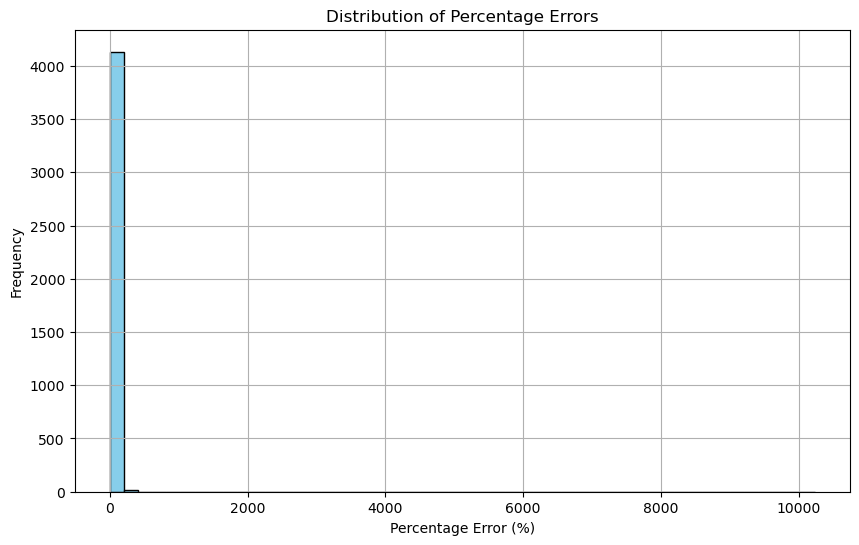


Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
timestamp      0.004313  0.000077  1.187729e-08  5  0.004471  0.004156
temperature    0.003152  0.000072  3.180458e-08  5  0.003299  0.003005
wind_speed     0.002211  0.000047  2.539095e-08  5  0.002308  0.002113


<Figure size 1200x800 with 0 Axes>

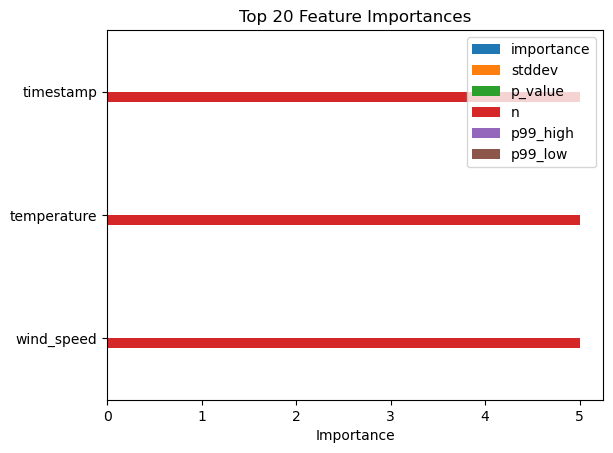

AttributeError: 'TabularPredictor' object has no attribute 'explain'

In [21]:
import numpy as np
# Reset index if needed
test_data = test_data.reset_index(drop=True)

# Compute SMAPE
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_values = np.where(denominator != 0, diff / denominator, 0)
    return np.mean(smape_values) * 100

# Replace 'target_column' with your actual target column name
y_true = test_data[target]
y_pred = predictor.predict(test_data)
smape_value = smape(y_true, y_pred)
print(f"\nSMAPE: {smape_value:.2f}%")

# Analyze percent-wise errors
percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
percentage_errors = np.where(y_true != 0, percentage_errors, 0)

mean_percentage_error = np.mean(percentage_errors)
median_percentage_error = np.median(percentage_errors)
max_percentage_error = np.max(percentage_errors)

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")
print(f"Max Percentage Error: {max_percentage_error:.2f}%")

# Plot percentage error distribution
plt.figure(figsize=(10, 6))
plt.hist(percentage_errors, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')
plt.grid(True)
plt.show()

# Feature Importance
global_importance = predictor.feature_importance(test_data)
print("\nFeature Importance:")
print(global_importance)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
global_importance.head(20).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Optional: SHAP Values for advanced insights
explainer = predictor.explain(test_data, model='best')
explainer.plot_feature_importance()
